**1. k-Nearest Neighbors algorithm**

The k-NN algorithm is the simplest machine learning algorithm. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset — its “nearest neighbors.”

**1.1 k-Neighbors classification**

In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.  

Basic k-nearest neighbor classification


> **Find** the k training examples (x1,y1),...,(xk, yk) that are closed to the test example x

> **Classification:** Predict the most ***frequent*** class among those out y










In [ ]:
!pip install mglearn

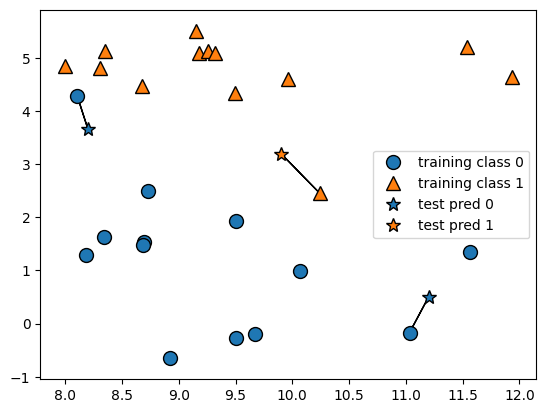

In [10]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1)

Here, we added three new data points, shown as stars. For each of them, we marked the closest point in the training set. The prediction of the one-nearest-neighbor algorithm is the label of that point (shown by the color of the cross).

Instead of considering only the closest neighbor, we can also consider an arbitrary number, **k**, of neighbors. This is where the name of the k-nearest neighbors algorithm comes from. When considering more than one neighbor, we use voting to assign a label. This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent: in other words, the majority class among the k-nearest neighbors. The following example uses the three closest neighbors:

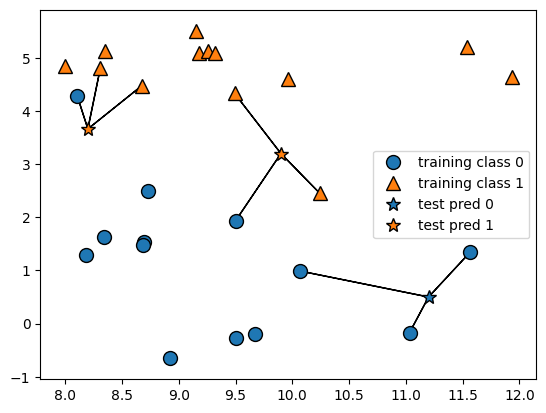

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Again, the prediction is shown as the color of the cross. You can see that the prediction for the new data point at the top left is not the same as the prediction when we used only one neighbor.

While this illustration is for a binary classification problem, this method can be applied to datasets with any number of classes. For more classes, we count how many neighbors belong to each class and again predict the most common class.

Now let’s look at how we can apply the k-nearest neighbors algorithm using scikit-learn. First, we split our data into a training and a test set so we can evaluate generalization performance.

**Analyzing k-NeighborsClassifier**

For two-dimensional datasets, we can also illustrate the prediction for all possible test points in the xy-plane. We color the plane according to the class that would be assigned to a point in this region. This lets us view the decision boundary, which is the divide between where the algorithm assigns class 0 versus where it assigns class 1.

The following code produces the visualizations of the decision boundaries for one, three, and nine neighbors.

In [11]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier(n_neighbors=3)
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=26, centers=2, random_state=5)

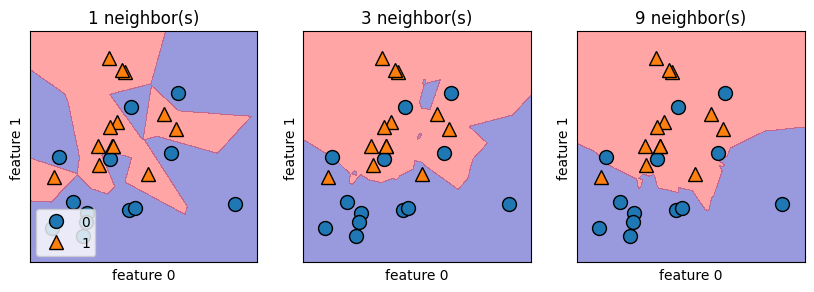

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn. discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

As you can see on the left in the figure, using a single neighbor results in a decision boundary that very closely follows the training data. **Considering more and more neighbors leads to a smoother decision boundary.** A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity, and using many neighbors corresponds to low model complexity.


> **Small k,** captures fine structures of problem space better, may be good for small training set


> **Larger k,** less sensitive to noise, better performance estimates for discrete classes. Larger training set allows use of larger k




Let’s investigate the connection between model complexity and generalization. We will do this on the real-world Breast Cancer dataset. We begin by splitting the dataset into a training and a test set. Then we evaluate training and test set performance with different numbers of neighbors. The results are shown in Figure.

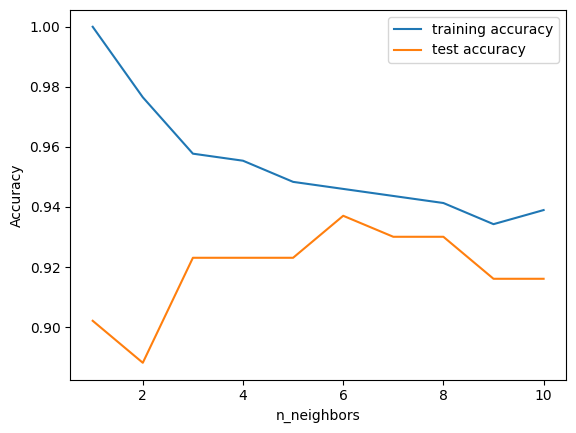

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors form 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. We can see some of the characteristics of overfitting and underfitting the model.

Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. **This is an example of the overfitting model which performs well on a training dataset and has no generalization ability.**

On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse, i.e. **Underfitting**.

The best performance is somewhere in the middle, using around six neighbors.

**Weighted Euclidean Distances**

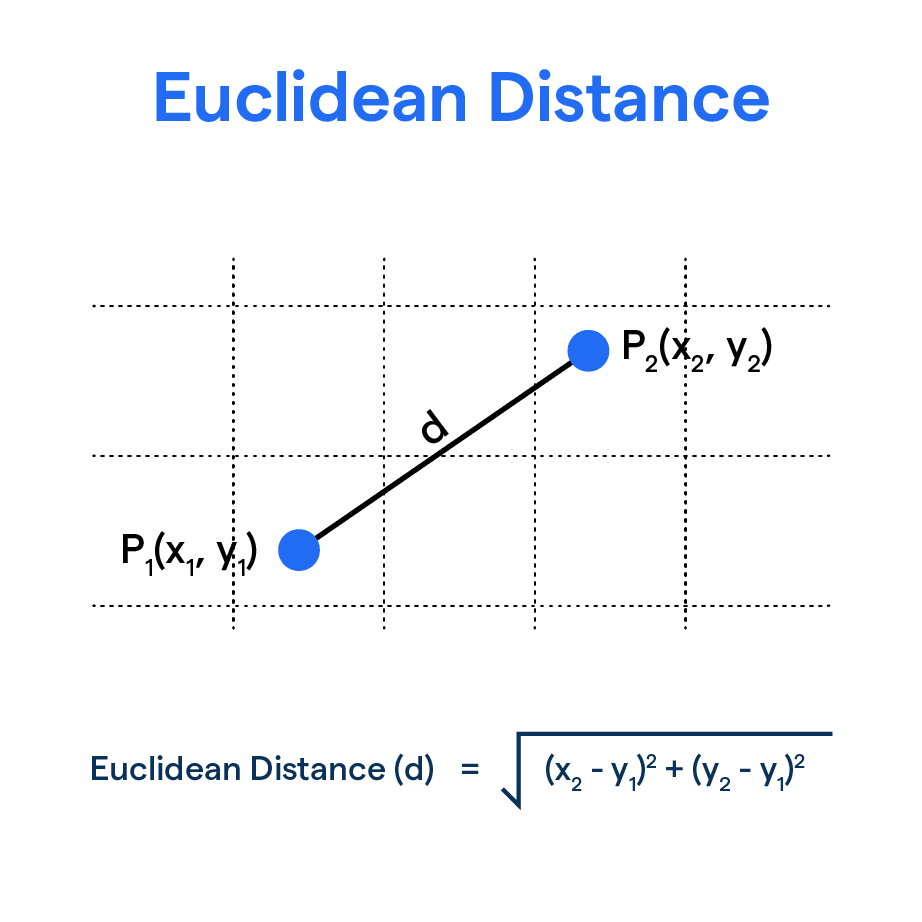

**Strengths, weaknesses, and parameters**

In principle, there are two important parameters to the k-Neighbors classifier: the number of neighbors and how you measure distance between data points.

In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter.

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques.

k-NN algorithm often does not perform well on datasets with many features (hundreds or more).

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features.